
# Entrega Trabajo Práctico Análisis Exploratorios y Curación de Datos **_Grupo 2-2_**

In [90]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import networkx as nx
import ftfy.badness as bad
from sklearn import preprocessing
from hashlib import md5
import sqlite3
import sys
import feedparser as fp

from utils import display_markdown

# EJERCICIOS EN CLASE 1, 2020-06-16
## Ejercicio 1: Trablas de Crecimiento.
#### 1. Descargar dataset en CSV Tablas de Peso
#### 2. Graficar las curvas correspondientes a cada percentil para niños y niñas
a. En la columna Sex, 1 representa a niños y 2 a niñas 

b. Las curvas de los percentiles correspondientes a un mismo sexo deben ir en un mismo gráfico.

c. Un gráfico para cada sexo


In [91]:
df = pd.read_csv("https://raw.githubusercontent.com/DiploDatos/AnalisisYCuracion/master/input/wtageinf.csv")
df[:2]

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
0,1,0.0,1.815151,3.530203,0.152385,2.355451,2.526904,2.773802,3.150611,3.530203,3.879077,4.172493,4.340293,4.446488
1,1,0.5,1.547523,4.003106,0.146025,2.799549,2.964656,3.209510,3.597396,4.003106,4.387423,4.718161,4.910130,5.032625


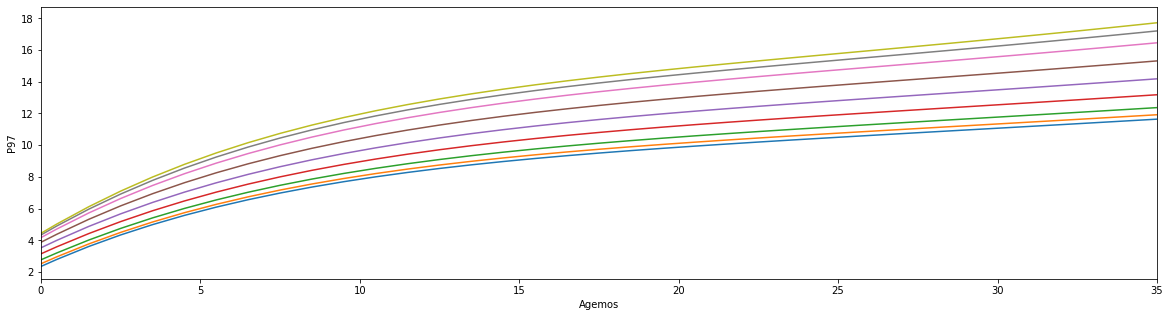

In [92]:
df_m=df[df.Sex==1]
df_f=df[df.Sex==2]

plt.figure(figsize=(20,5))
plt.xlim(0,35)
for column in df_m.loc[0, "P3":"P97"].index:
    sb.lineplot(data=df_m, x="Agemos", y=column)


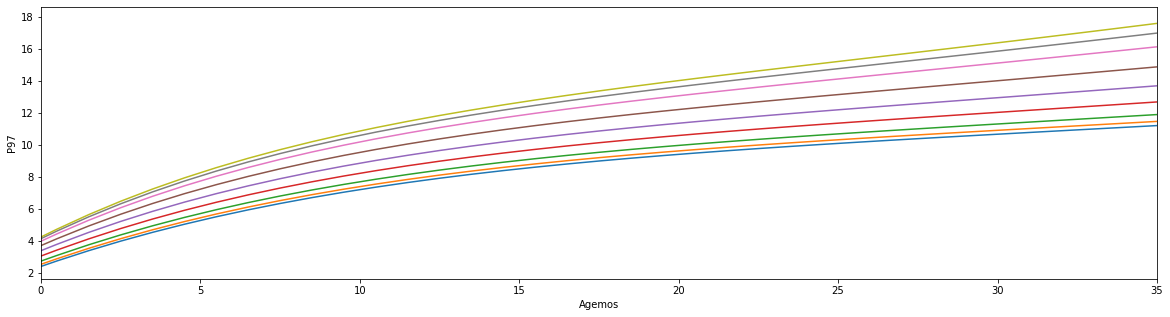

In [93]:
plt.figure(figsize=(20,5))
plt.xlim(0,35)
for column in df_m.loc[0, "P3":"P97"].index:
    sb.lineplot(data=df_f, x="Agemos", y=column)

## Ejercicio 2: Pasos Fronterizos
#### 1. Descargar dataset en JSON: Pasos Fronterizos
#### 2. Graficar un gráfico de barras agrupando por valor del atributo “province”

In [94]:
df2 = pd.read_json("https://raw.githubusercontent.com/DiploDatos/AnalisisYCuracion/master/input/pasos.json")

In [95]:
# Nombre de provincias en lower case
df2["province"] = df2["province"].str.capitalize()
df2

,province,location,name
0,Tierra del fuego,"[-54.832543, -68.3712885]",SAN SEBASTIAN ( USHUAIA )
1,Tierra del fuego,"[-54.8249379, -68.3258626]",AERO PUBLICO DE USHUAIA
2,Tierra del fuego,"[-54.8096728, -68.3114748]",PUERTO USHUAIA (PREFECTURA)
3,Tierra del fuego,"[-54.8019121, -68.3029511]",PUERTO USHUAIA
4,Santa cruz,"[-51.6896359, -72.2993574]",PASO LAURITA CASAS VIEJAS
...,...,...,...
247,Chubut,"[-45.2213569, -71.3610803]",PASO PAMPA ALTA
248,Santa cruz,"[-48.8772007, -72.7288579]",PASO PORTEZUELO DE LA DIVISORIA
249,Buenos aires,"[-34.1176359, -57.9897668]",ROU COLONIA
250,Buenos aires,"[-34.1176359, -57.9897668]",ROU COLONIA


In [96]:
df2[df2["province"].str.contains("Aeropuerto")] = 'Santa Cruz'

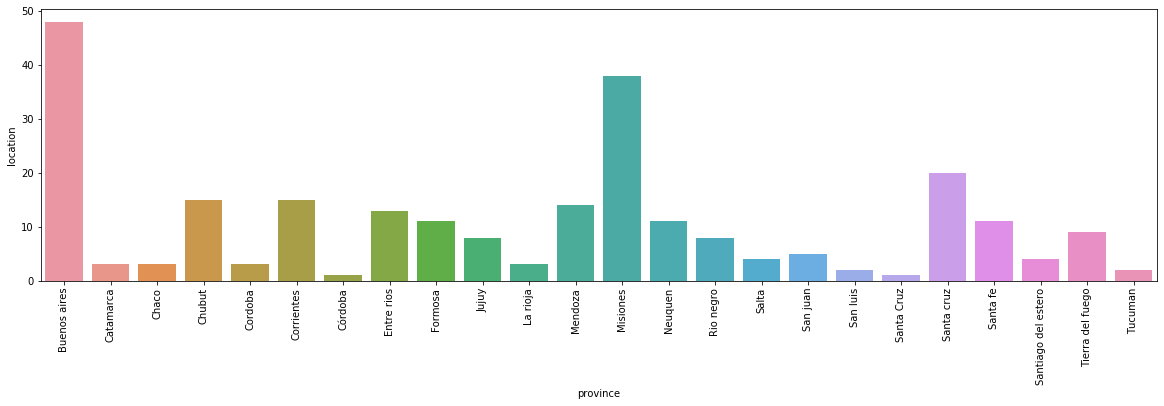

In [97]:
df3=df2.groupby("province").count().reset_index()
plt.figure(figsize=(20, 5))
sb.barplot(data=df3, x="province", y="location")
plt.xticks(rotation=90);

# EJERCICIOS EN CLASE 2, 2020-06-20
## Ejercicio 3: 
#### Representación de grafos

In [98]:
#[['0', '2'], ['1', '3'], ['2', '3'], ['2', '4'], ['3', '5'], ['4', '5']]
Graph = {'nodes': ['0', '1', '2', '3', '4', '5'],
         'edges': [('0', '2'), ('1', '3'), ('2', '3'), ('2', '4'), ('3', '5'), ('4', '5')]}

In [99]:
g = nx.DiGraph()
g.add_nodes_from(Graph['nodes'])
g.add_edges_from(Graph['edges'])

In [100]:
nx.to_pandas_adjacency(g)

,0,1,2,3,4,5
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
nx.to_pandas_edgelist(g)

,source,target
0,0,2
1,1,3
2,2,3
3,2,4
4,3,5
5,4,5


In [102]:
nx.to_dict_of_lists(g)

{'0': ['2'], '1': ['3'], '2': ['3', '4'], '3': ['5'], '4': ['5'], '5': []}

# Ejercicios correspondientes a Notebook Limpieza de datos visto en clases:
https://github.com/DiploDatos/AnalisisYCuracion/blob/master/notebooks/Limpieza.ipynb
## Ejercicio 1:

#### Armar una tabla con todos los proyectos con nombres duplicados, ordenados para revisar agrupados. 

In [103]:
BASE_DIR = "https://github.com/DiploDatos/AnalisisYCuracion/raw/master/"
kickstarter_2018 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv", 
                               parse_dates=["deadline","launched"],
                               index_col=['ID'])

In [104]:
kd = kickstarter_2018[kickstarter_2018.name.duplicated(keep=False)].sort_values(by='name')
print(kd.shape)
kd

(5125, 14)


,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
816998285,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-02-09,6500.0,2013-12-19 21:51:50,0.0,canceled,0,US,0.00,0.00,6500.00
815783250,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-03-01,6500.0,2014-01-03 20:39:16,37.0,failed,3,US,37.00,37.00,6500.00
1010584633,"""A Fresh Start""",Shorts,Film & Video,USD,2011-09-25,3000.0,2011-08-28 21:27:52,3000.0,successful,24,US,3000.00,3000.00,3000.00
713417995,"""A Fresh Start""",Documentary,Film & Video,USD,2013-03-27,5000.0,2013-01-26 03:51:47,1417.0,failed,26,US,1417.00,1417.00,5000.00
1880084695,"""American Sports Stories"" - An Athletic Quest",Shorts,Film & Video,USD,2015-08-26,100000.0,2015-06-27 02:02:00,100.0,failed,1,US,100.00,100.00,100000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329580179,xxx (Canceled),Art,Art,USD,2011-09-03,10000.0,2011-06-05 04:54:37,1151.0,canceled,18,US,1151.00,1151.00,10000.00
1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00
634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97


## Ejercicio 2:
#### Verificar que los proyectos que tienen nombres duplicados también tienen el hash de nombre duplicado

In [105]:
def hashit(val):
    if isinstance(val, float): 
        return str(val)
    return md5(val.encode('utf-8')).hexdigest()

kickstarter_2018['hashed_name'] = kickstarter_2018['name'].astype(str).apply(hashit)

In [106]:
kd = kickstarter_2018[kickstarter_2018.name.duplicated(keep=False)].sort_values(by='name')[['name', 'hashed_name']]
print(kd.shape)
kd

(5125, 2)


,name,hashed_name
ID,,
816998285,"""...The Last shall be first..."" LODB Lifestyle...",0c7a251ffe4c7834cbc4b04906952ff1
815783250,"""...The Last shall be first..."" LODB Lifestyle...",0c7a251ffe4c7834cbc4b04906952ff1
1010584633,"""A Fresh Start""",67554ab4203d95f2f2f05365f768206e
713417995,"""A Fresh Start""",67554ab4203d95f2f2f05365f768206e
1880084695,"""American Sports Stories"" - An Athletic Quest",19a82bc4c5961834282575d07d9b5f7c
...,...,...
329580179,xxx (Canceled),930857c212f21166427b23d4a7fe52a3
1848699072,NaN,a3d2de7675556553a5f08e4c88d2c228
634871725,NaN,a3d2de7675556553a5f08e4c88d2c228


# EJERCICIOS EN CLASE 3, 2020-07-03

## Ejercicio 3

#### Comparar la cantidad de nombres raros en kickstarter_2018 con la que obtenemos al cargar 'ks-projects-201801.csv' con encoding iso-8859-1.

In [107]:
def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)

kickstarter_2018['name_weirdness'] = kickstarter_2018['name'].apply(weird)

In [108]:
iso_enc_kickstarter_2018 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv", encoding='iso-8859-1')
iso_enc_kickstarter_2018['name_weirdness'] = iso_enc_kickstarter_2018['name'].apply(weird)

In [109]:
print('Cantidad en `kickstarter_2018`: {}'.format(len(kickstarter_2018[kickstarter_2018.name_weirdness > 1])))
print('Cantidad en `kickstarter_2018` con codificación ISO-8859-1: {}'.format(len(iso_enc_kickstarter_2018[iso_enc_kickstarter_2018.name_weirdness > 1])))

Cantidad en `kickstarter_2018`: 26
Cantidad en `kickstarter_2018` con codificación ISO-8859-1: 7699


In [110]:
kickstarter_2018 = kickstarter_2018.dropna(subset=['name'])

In [111]:
kickstarter_2018 = kickstarter_2018.fillna(0)

In [112]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(kickstarter_2018.currency)
dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

{'AUD': 0,
 'CAD': 1,
 'CHF': 2,
 'DKK': 3,
 'EUR': 4,
 'GBP': 5,
 'HKD': 6,
 'JPY': 7,
 'MXN': 8,
 'NOK': 9,
 'NZD': 10,
 'SEK': 11,
 'SGD': 12,
 'USD': 13}

In [113]:
label_binarizer = preprocessing.LabelBinarizer()
label_binarizer.fit(kickstarter_2018.currency)
pd.DataFrame(label_binarizer.transform(kickstarter_2018.currency),
             columns=(pd.Series(label_binarizer.classes_))).sample(10)

,AUD,CAD,CHF,DKK,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD
286272,0,0,0,0,0,0,0,0,0,0,0,0,0,1
287768,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12478,0,0,0,0,0,0,0,0,0,0,0,0,0,1
82905,0,0,0,0,0,0,0,0,0,0,0,0,0,1
134107,0,0,0,1,0,0,0,0,0,0,0,0,0,0
311632,0,0,0,0,0,0,0,0,0,0,0,0,0,1
139432,0,0,0,0,0,0,0,0,0,0,0,0,0,1
290573,0,0,0,0,0,0,0,0,0,0,0,0,0,1
272025,0,0,0,0,0,0,0,0,0,0,0,0,0,1
270385,0,0,0,0,0,1,0,0,0,0,0,0,0,0


## Ejercicio 5
#### 1. ¿Hay proyecto éxitosos que no consiguieron el objetivo? Si hay, ¿Qué porcentaje sí y cuál no?

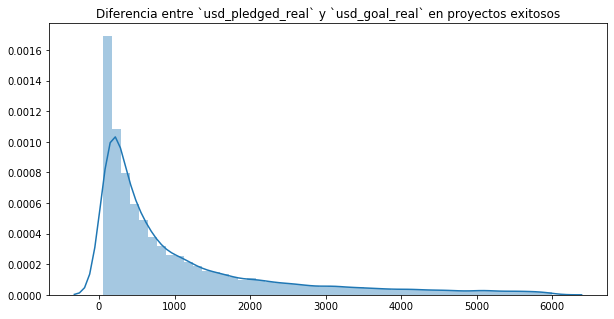

In [114]:
successful_projects = kickstarter_2018[kickstarter_2018.state == 'successful']
usd_diff = successful_projects.usd_pledged_real - successful_projects.usd_goal_real

plt.figure(figsize=(10, 5))
sb.distplot(usd_diff[usd_diff.between(usd_diff.quantile(0.15), usd_diff.quantile(0.85))])
plt.title('Diferencia entre `usd_pledged_real` y `usd_goal_real` en proyectos exitosos');

In [115]:
proj_achieved_goal_prop = len(successful_projects[usd_diff >= 0]) / len(successful_projects)
display_markdown(
    '**{:.4%}** de los proyectos exitosos consiguieron el objetivo, **{:.4%}** no lo hicieron.'.format(
        proj_achieved_goal_prop,
        1 - proj_achieved_goal_prop
    )
)

**99.9963%** de los proyectos exitosos consiguieron el objetivo, **0.0037%** no lo hicieron.

#### 2. Calcular una tabla con la cantidad de proyectos por categoría principal y estado.

In [116]:
col_names = ['category', 'state']
groups = kickstarter_2018[col_names].reset_index().groupby(col_names).count()
groups.columns = ['n_projects']
groups.sort_values('n_projects', ascending=False)[:20]

n_projects
category       state                 
Product Design failed           10718
Documentary    failed            8599
Product Design successful        7962
Tabletop Games successful        7866
Food           failed            7119
Video Games    failed            6941
Shorts         successful        6673
Music          successful        6432
               failed            6201
Documentary    successful        5924
Fiction        failed            5875
Film & Video   failed            5554
Fashion        failed            5341
Nonfiction     failed            5184
Apps           failed            4909
Apparel        failed            4752
Shorts         failed            4721
Technology     failed            4409
Theater        successful        4405
Art            failed            4101


## Ejercicio 6
#### Calcular los valores atípicos de 'usd_goal_real' y graficar los boxplots, con y sin estos valores por categoría

In [117]:
usd_goal_real_is_outlier = (
    kickstarter_2018.usd_goal_real >
    kickstarter_2018.usd_goal_real.mean() + 3 * kickstarter_2018.usd_goal_real.std()
)
display_markdown(
    'La cantidad de valores atípicos de `usd_goal_real` es **{}**.'.format(
        len(kickstarter_2018[usd_goal_real_is_outlier])
    )
)

La cantidad de valores atípicos de `usd_goal_real` es **372**.

In [118]:
selected_categories = kickstarter_2018.category.sort_values().unique()[:30]

In [ ]:
plt.figure(figsize=(15, 8))
sb.boxplot(
    data=kickstarter_2018[kickstarter_2018.category.isin(selected_categories)].sort_values('category'),
    x='category', y='usd_goal_real', color='blue'
)
plt.xticks(rotation=90)
plt.title('`usd_goal_real` por categoría')
plt.ticklabel_format(axis='y', style='plain')

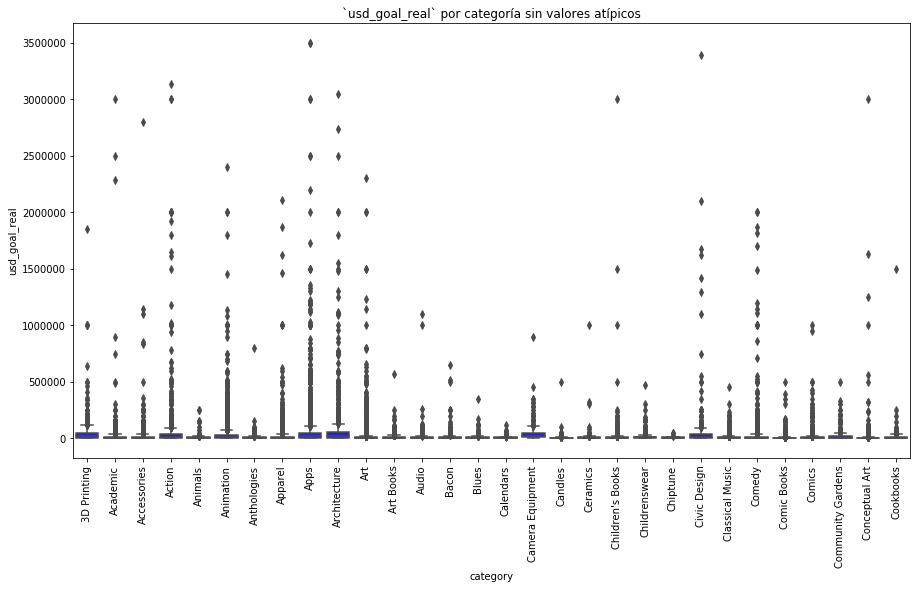

In [80]:
plt.figure(figsize=(15, 8))
sb.boxplot(
    data=kickstarter_2018[kickstarter_2018.category.isin(selected_categories) & ~usd_goal_real_is_outlier].sort_values('category'),
    x='category', y='usd_goal_real', color='blue'
)
plt.xticks(rotation=90)
plt.title('`usd_goal_real` por categoría sin valores atípicos');

# EJERCICIOS EN CLASE 4, 2020-07-04

## Práctico SQL
* Canciones de Iron Maiden
* Discos con más de 25 canciones
* Las 10 canciones más populares


In [81]:
dbc = sqlite3.connect('./chinook.db')
dbcur = dbc.cursor()


In [82]:
dbcur.execute("SELECT name FROM sqlite_master WHERE type='table';")
dbcur.fetchall()

[('albums',),
 ('sqlite_sequence',),
 ('artists',),
 ('customers',),
 ('employees',),
 ('genres',),
 ('invoices',),
 ('invoice_items',),
 ('media_types',),
 ('playlists',),
 ('playlist_track',),
 ('tracks',),
 ('sqlite_stat1',)]

In [83]:
pd.read_sql_query('select * from tracks;', dbc).columns

Index(['TrackId', 'Name', 'AlbumId', 'MediaTypeId', 'GenreId', 'Composer',
       'Milliseconds', 'Bytes', 'UnitPrice'],
      dtype='object')

In [84]:
pd.read_sql_query('select * from artists;', dbc).columns

Index(['ArtistId', 'Name'], dtype='object')

In [85]:
pd.read_sql_query('select * from albums;', dbc).columns

Index(['AlbumId', 'Title', 'ArtistId'], dtype='object')

### Canciones de Iron Maiden

In [86]:
pd.read_sql_query("""
                  SELECT * FROM tracks t, albums a, artists ar 
                  WHERE t.AlbumId = a.AlbumId 
                  AND a.ArtistId = ar.ArtistId 
                  AND ar.Name = 'Iron Maiden';""", dbc)

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice,AlbumId,Title,ArtistId,ArtistId,Name
0,1201,Different World,94,2,1,None,258692,4383764,0.99,94,A Matter of Life and Death,90,90,Iron Maiden
1,1202,These Colours Don't Run,94,2,1,None,412152,6883500,0.99,94,A Matter of Life and Death,90,90,Iron Maiden
2,1203,Brighter Than a Thousand Suns,94,2,1,None,526255,8721490,0.99,94,A Matter of Life and Death,90,90,Iron Maiden
3,1204,The Pilgrim,94,2,1,None,307593,5172144,0.99,94,A Matter of Life and Death,90,90,Iron Maiden
4,1205,The Longest Day,94,2,1,None,467810,7785748,0.99,94,A Matter of Life and Death,90,90,Iron Maiden
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,1409,The Clansman,114,1,1,Steve Harris,539689,21592327,0.99,114,Virtual XI,90,90,Iron Maiden
209,1410,When Two Worlds Collide,114,1,1,Blaze Bayley/David Murray/Steve Harris,377312,15093888,0.99,114,Virtual XI,90,90,Iron Maiden
210,1411,The Educated Fool,114,1,1,Steve Harris,404767,16191616,0.99,114,Virtual XI,90,90,Iron Maiden
211,1412,Don't Look To The Eyes Of A Stranger,114,1,1,Steve Harris,483657,19347584,0.99,114,Virtual XI,90,90,Iron Maiden


### Discos con más de 25 canciones


In [87]:
pd.read_sql_query("""\
                  SELECT a.title, ar.name as artist_name, count(t.trackid) as track_count
                    FROM tracks t, albums a, artists ar
                    WHERE t.AlbumId = a.AlbumId
                    AND ar.artistid = a.artistid
                    GROUP BY a.albumid
                    having track_count > 25
                    order by track_count desc;""", dbc)

,Title,artist_name,track_count
0,Greatest Hits,Lenny Kravitz,57
1,Minha Historia,Chico Buarque,34
2,Unplugged,Eric Clapton,30
3,"Lost, Season 3",Lost,26


### Las 10 canciones más populares

In [88]:
pd.read_sql_query("""\
                  SELECT t.name, ar.name, count(pt.playlistid) as playlist_count
                  FROM tracks t, albums a, artists ar, playlist_track pt
                  WHERE t.AlbumId = a.AlbumId
                  AND ar.artistid = a.artistid
                  AND pt.trackid = t.trackid
                  group by pt.trackid
                  order by playlist_count desc
                  limit 10;""", dbc)

,Name,Name,playlist_count
0,Intoitus: Adorate Deum,Alberto Turco & Nova Schola Gregoriana,5
1,"Miserere mei, Deus","Richard Marlow & The Choir of Trinity College,...",5
2,"Aria Mit 30 Veränderungen, BWV 988 ""Goldberg V...",Wilhelm Kempff,5
3,"Suite for Solo Cello No. 1 in G Major, BWV 100...",Yo-Yo Ma,5
4,"The Messiah: Behold, I Tell You a Mystery... T...",Scholars Baroque Ensemble,5
5,Solomon HWV 67: The Arrival of the Queen of Sheba,Academy of St. Martin in the Fields & Sir Nevi...,5
6,Symphony No.5 in C Minor: I. Allegro con brio,Orchestre Révolutionnaire et Romantique & John...,5
7,Ave Maria,"Britten Sinfonia, Ivor Bolton & Lesley Garrett",5
8,"Nabucco: Chorus, ""Va, Pensiero, Sull'ali Dorate""","Chicago Symphony Chorus, Chicago Symphony Orch...",5
9,Die Walküre: The Ride of the Valkyries,Sir Georg Solti & Wiener Philharmoniker,5


### 2. Ejercicio FEED PARSER RSS

In [89]:
parsed = fp.parse('https://www.lavoz.com.ar/rss/tecnologia.xml')
posts = parsed.entries
print(len(posts))
[post.title for post in posts]

30


['Zoom soluciona un fallo de seguridad en la personalización de url que permitía lanzar campañas de phishing',
 'Ultra rápida: lanzan un sistema que carga el 33% de la batería del celu en tres minutos',
 'La explicación de Twitter al hackeo masivo de cuentas',
 'Hackearon las cuentas de Twitter de Obama, Biden y Gates',
 'Facebook transmitirá videos musicales con licencia oficial a partir de agosto',
 'Google Maps permite calibrar la ubicación del usuario con Live View',
 'El nuevo diseño de Gmail integrará Chat, Rooms y Meet',
 'Con el 5G aún en pañales, Samsung tiene fecha estimada para la llegada del 6G',
 'Descubren una app de chat para Android que espía a los usuarios y roba sus datos',
 'Venden un Súper Mario Bros de 1985 precintado por U$S 114.000 y se convierte en el juego más caro del mundo',
 'Apple aconseja no usar protectores para tapar la webcam de los MacBook: qué alternativas propone',
 'Un ratito más: la pulsera de Fitbit despertará a los usuarios "en el mejor momento"'